In [1]:
!pip install pyphi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
import pickle
import math
from operator import add
import torch
import torch.nn as nn
import pyphi
np.set_printoptions(threshold=sys.maxsize)


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



In [3]:
def make_rule(integer):
    binary = str(bin(integer)[2:])
    
    if len(binary) < 8:
        binary = binary.zfill(8)
    
    def rule_function(array):
        row1 = array
        next_row = array.copy()
        for x in range(1, len(row1)-1):
                
            # Given cell state is "off", then update given the neighbors like - 
            if row1[x] == 0:
                if (row1[x-1] == 0) and (row1[x+1] == 0):
                    next_row[x] = int(binary[7])

                if (row1[x-1] == 0) and (row1[x+1] == 1):
                    next_row[x] = int(binary[6])

                if (row1[x-1] == 1) and (row1[x+1] == 0):
                    next_row[x] = int(binary[3])

                if (row1[x-1] == 1) and (row1[x+1] == 1):
                    next_row[x] = int(binary[2])

            # Given cell state is "on", then update given the neighbors like -   
            else:
                if (row1[x-1] == 0) and (row1[x+1] == 0):
                    next_row[x] = int(binary[5])

                if (row1[x-1] == 0) and (row1[x+1] == 1):
                    next_row[x] = int(binary[4])

                if (row1[x-1] == 1) and (row1[x+1] == 0):
                    next_row[x] = int(binary[1])

                if (row1[x-1] == 1) and (row1[x+1] == 1):
                    next_row[x] = int(binary[0])
                    
            next_row[0] = next_row[1]
            next_row[len(row1)-1] = next_row[len(row1)-2]

        return np.array(next_row)

    return rule_function

In [4]:
# NOTE: 'timestep' variable used to denote the timestep in which the perturbation will occur, and 'n' is the number of...
#... iterations performed by the ECA. 

def apply_rule(rule_function, n, perturbation_boolean, timestep, cell):
    ini_state = initial_state(2*n + 1)
    rv = []
    rv.append(ini_state)
    if perturbation_boolean == True:
        for i in range(1, n):
            if i == timestep:
                timestep_update = rule_function(ini_state)
                if timestep_update[cell] == 0:
                    timestep_update[cell] = 1
                else:
                    timestep_update[cell] = 0
                    
                rv.append(timestep_update)
                ini_state = timestep_update
                
            else:
                timestep_update = rule_function(ini_state)
                rv.append(timestep_update)
                ini_state = timestep_update
          
    else:
        for i in range(1, n):
            timestep_update = rule_function(ini_state)
            rv.append(timestep_update)
            ini_state = timestep_update
        
    return np.array(rv)

In [5]:
def initial_state(width):
    initial = np.zeros((1, width), dtype=int)
    if width % 2 == 0:
        initial = np.insert(initial, int(width / 2), values=0, axis=1)
        initial[0, int(width / 2)] = 1
        return initial[0]
    else:
        initial[0, int(width / 2)] = 1
        return initial[0]

Text(0.5, 0, 'Cell Index')

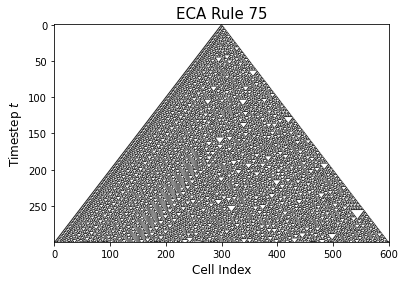

In [6]:
rule_function_use = make_rule(30)

plt.imshow(apply_rule(rule_function_use, 300, False, 0, 0), cmap='binary', aspect='auto')
plt.title('ECA Rule 75', fontsize=15)
plt.ylabel("Timestep $t$", fontsize=12)
plt.xlabel("Cell Index", fontsize=12)

In [7]:
def TPM(rule_function, number_of_cells):
    
    maximum_range = 2**(number_of_cells+2)
    TPM_matrix = []
    
    for i in range(maximum_range):
        
        binary = bin(i)[2:]
        binary = binary.zfill(number_of_cells+2)
        
        state_iter_array = [int(i) for i in str(binary)]
        next_timestep = rule_function(state_iter_array)
        
        
        TPM_matrix.append(next_timestep)    
        
    return TPM_matrix

In [46]:
rule_30 = make_rule(30)
TPM_matrix = TPM(rule_30, 14)
print(TPM_matrix)
print(len(TPM_matrix[0]))
for i in range(len(TPM_matrix)):
  if list(TPM_matrix[i]) == [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
rule_30 = make_rule(30)
TPM_matrix = TPM(rule_30, 14)
for i in range(len(TPM_matrix)):
  if list(TPM_matrix[i]) ==[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]:
    print(i)
    print(bin(i)[2:].zfill(16))

In [44]:
print(len([0,1,1,1,1,1,1,1,1,1,1,1,1,1,0]))

15


In [9]:
# n = 3





# m = n+2
# cm = []

# for i in range(m):
    
#     l_cm = np.zeros(m)
    
#     if i > 0 and i < m-1:
        
#         l_cm[i] = 1
#         l_cm[i-1] = 1
#         l_cm[i+1] = 1
        
#     cm.append(l_cm)

# print(cm)

# subsystem_list = []

# for i in range(n):
#     subsystem_list.append(i+1)
    
# print(subsystem_list)

# labels = ('$\gamma$', 'A', 'B', 'C', '$\delta$')

# network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)

In [10]:
# n = 5
# values = []
# values_list = []

# for i in range(2**n):
#   blah = []
#   binary = str(bin(i)[2:])
#   if len(binary) < n:
#     binary = binary.zfill(n)

#   for char in binary:
#     blah.append(int(char))

#   state = tuple(blah)

#   try:
#     print(i)
#     subsystem = pyphi.Subsystem(network, state, subsystem_list)
#     value = pyphi.compute.phi(subsystem)
#     sia = pyphi.compute.sia(subsystem)
#     concepts = len(sia.ces)
#     if value != 0:
#       print(state)
#       print(value)
#       print(concepts)
#       print('************************************************')
#   except:
#     continue

In [11]:
# def make_rule_V2(integer):
#     binary = str(bin(integer)[2:])
    
#     if len(binary) < 32:
#         binary = binary.zfill(32)
    
#     def rule_function_V2(array):
#         row1 = array
#         next_row = array.copy()
#         for x in range(2, len(row1)-2):
                
#             # Given cell state is "off", then update given the neighbors like - 
#             if row1[x] == 0:
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[0])
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[1])
    
                    
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[2])
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[3])
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[4])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[5])
                    
                
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[6])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[7])

#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[8])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[9])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[10])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[11])
                    
                    
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[12])
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[13])
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[14])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[15])
            

#             # Given cell state is "on", then update given the neighbors like -   
#             else:
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[16])
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[17])
    
                    
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[18])
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[19])
                
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[20])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[21])
                    
                
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[22])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[23])

#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[24])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[25])
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[26])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[27])
                    
                    
                    
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 0):
#                     next_row[x] = int(binary[28])
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 1) and (row1[x+1] == 0) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[29])
                
#                 if (row1[x-2] == 1) and (row1[x-1] == 0) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[30])
                    
#                 if (row1[x-2] == 0) and (row1[x-1] == 1) and (row1[x+1] == 1) and (row1[x+2] == 1):
#                     next_row[x] = int(binary[31])

                    
#             next_row[0] = next_row[2]
#             next_row[1] = next_row[2]
#             next_row[len(row1)-1] = next_row[len(row1)-3]
#             next_row[len(row1)-2] = next_row[len(row1)-3]
            

#         return np.array(next_row)

#     return rule_function_V2

In [12]:
# # NOTE: 'timestep' variable used to denote the timestep in which the perturbation will occur, and 'n' is the number of...
# #... iterations performed by the ECA. 

# def apply_rule_V2(rule_function, n, perturbation_boolean, timestep, cell):
#     ini_state = initial_state(4*n + 1)
#     rv = []
#     rv.append(ini_state)
#     if perturbation_boolean == True:
#         for i in range(1, n):
#             if i == timestep:
#                 timestep_update = rule_function(ini_state)
#                 if timestep_update[cell] == 0:
#                     timestep_update[cell] = 1
#                 else:
#                     timestep_update[cell] = 0
                    
#                 rv.append(timestep_update)
#                 ini_state = timestep_update
                
#             else:
#                 timestep_update = rule_function(ini_state)
#                 rv.append(timestep_update)
#                 ini_state = timestep_update
          
#     else:
#         for i in range(1, n):
#             timestep_update = rule_function(ini_state)
#             rv.append(timestep_update)
#             ini_state = timestep_update
        
#     return np.array(rv)

In [13]:
# rule_30 = make_rule_V2(2294967296)

# plt.imshow(apply_rule_V2(rule_30, 300, False, 0, 0), cmap='binary', aspect='auto')

In [14]:
def TPM_V2(rule_function, number_of_cells):
    
    maximum_range = 2**(number_of_cells+2)
    TPM_matrix = []
    
    for i in range(maximum_range):
        
        binary = bin(i)[2:]
        binary = binary.zfill(number_of_cells+2)
        
        state_iter_array = [int(i) for i in str(binary)]
        next_timestep = rule_function(state_iter_array)
        
        
        TPM_matrix.append(next_timestep)    
        
    return TPM_matrix

In [15]:
# n = 5


# TPM_matrix = TPM_V2(rule_30, n)


# m = n+2
# cm = []

# for i in range(m):
    
#     l_cm = np.zeros(m)
    
#     if i > 1 and i < m-2:
        
#         l_cm[i] = 1
#         l_cm[i-1] = 1
#         l_cm[i-2] = 1
#         l_cm[i+1] = 1
#         l_cm[i+2] = 1
        
#     cm.append(l_cm)

# print(cm)

# subsystem_list = []

# for i in range(2, n):
#     subsystem_list.append(i)
    
# print(subsystem_list)

# labels = ('$\gamma$', '$theta$', 'A', 'B', 'C', '$eta$', '$\delta$')

# network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)

In [16]:
# n = 7
# values = []
# values_list = []
# count = 0

# for i in range(2**n):
#   blah = []
#   binary = str(bin(i)[2:])
#   if len(binary) < n:
#     binary = binary.zfill(n)

#   for char in binary:
#     blah.append(int(char))

#   state = tuple(blah)

#   try:
#     print(i)
#     subsystem = pyphi.Subsystem(network, state, subsystem_list)
#     value = pyphi.compute.phi(subsystem)
#     sia = pyphi.compute.sia(subsystem)
#     concepts = len(sia.ces)
#     if value != 0:
#       count += 1
#       print(state)
#       print(value)
#       print(concepts)
#       print('counter', count)
#       print('************************************************')
#   except:
#     continue

In [17]:
# rule_30 = make_rule_V2(331267296)

# plt.imshow(apply_rule_V2(rule_30, 300, False, 0, 0), cmap='binary', aspect='auto')

In [18]:
# n = 5


# TPM_matrix = TPM_V2(rule_30, n)


# m = n+2
# cm = []

# for i in range(m):
    
#     l_cm = np.zeros(m)
    
#     if i > 1 and i < m-2:
        
#         l_cm[i] = 1
#         l_cm[i-1] = 1
#         l_cm[i-2] = 1
#         l_cm[i+1] = 1
#         l_cm[i+2] = 1
        
#     cm.append(l_cm)

# print(cm)

# subsystem_list = []

# for i in range(2, n):
#     subsystem_list.append(i)
    
# print(subsystem_list)

# labels = ('$\gamma$', '$theta$', 'A', 'B', 'C', '$eta$', '$\delta$')

# network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)

In [19]:
# n = 7
# values = []
# values_list = []
# count = 0

# for i in range(2**n):
#   blah = []
#   binary = str(bin(i)[2:])
#   if len(binary) < n:
#     binary = binary.zfill(n)

#   for char in binary:
#     blah.append(int(char))

#   state = tuple(blah)

#   try:
#     print(i)
#     subsystem = pyphi.Subsystem(network, state, subsystem_list)
#     value = pyphi.compute.phi(subsystem)
#     sia = pyphi.compute.sia(subsystem)
#     concepts = len(sia.ces)
#     if value != 0:
#       count += 1
#       print(state)
#       print(value)
#       print(concepts)
#       print('counter', count)
#       print('************************************************')
#   except:
#     continue

In [20]:
n = 3
m = n+2
cm = []
phi_averages_list = []
concepts_averages_list = []

for i in range(m):
    l_cm = np.zeros(m)
    if i > 0 and i < m-1:
        l_cm[i] = 1
        l_cm[i-1] = 1
        l_cm[i+1] = 1
    cm.append(l_cm)

subsystem_list = []

for i in range(n):
    subsystem_list.append(i+1)
    
print(subsystem_list)

labels = ('$\gamma$', 'A', 'B', 'C', '$\delta$')


# for i in range(30):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_1", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_1", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

[1, 2, 3]


In [21]:
# for i in range(30, 60):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_2", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_2", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

In [22]:
# for i in range(60, 90):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_3", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_3", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

In [23]:
# for i in range(90, 120):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_4", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_4", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

In [24]:
# for i in range(120, 150):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_5", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_5", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

In [25]:
# for i in range(150, 180):
#   print('**********************************')
#   print(i)
#   rule_30 = make_rule(i)
#   TPM_matrix = TPM(rule_30, n)
#   network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
#   counter = 0
#   phi_sum = 0
#   concepts_sum = 0  

#   for j in range(2**5):
#     blah = []
#     binary = str(bin(j)[2:])
#     if len(binary) < 5:
#       binary = binary.zfill(5)

#     for char in binary:
#       blah.append(int(char))

#     state = tuple(blah)

#     try:
#       subsystem = pyphi.Subsystem(network, state, subsystem_list)
#       value = pyphi.compute.phi(subsystem)
#       sia = pyphi.compute.sia(subsystem)
#       concepts = len(sia.ces)
#       if value != 0:
#         phi_sum += value
#         concepts_sum += concepts
#         counter += 1
#     except:
#       continue
#   if counter == 0:
#     phi_averages_list.append(0)
#     concepts_averages_list.append(0)
#   else:
#     phi_averages_list.append(phi_sum/counter)
#     concepts_averages_list.append(concepts_sum/counter)

#   if i%5 == 0:
#     with open("Saved_Phi_List_6", "wb") as pf:
#       pickle.dump(phi_averages_list, pf)
      
#     with open("Saved_Concepts_List_6", "wb") as fp:
#       pickle.dump(concepts_averages_list, fp)

In [26]:
with open("Saved_Concepts_List_7", "rb") as pf:   # Unpickling
    Saved_Concepts_List = pickle.load(pf)

with open("Saved_Phi_List_7", "rb") as pf:   # Unpickling
    Saved_Phi_List = pickle.load(pf)
    
print(len(Saved_Concepts_List_7))
print(len(Saved_Phi_List_7))


for i in range(191, 210):
  print('**********************************')
  print(i)
  rule_30 = make_rule(i)
  TPM_matrix = TPM(rule_30, n)
  network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
  counter = 0
  phi_sum = 0
  concepts_sum = 0  

  for j in range(2**5):
    blah = []
    binary = str(bin(j)[2:])
    if len(binary) < 5:
      binary = binary.zfill(5)

    for char in binary:
      blah.append(int(char))

    state = tuple(blah)

    try:
      subsystem = pyphi.Subsystem(network, state, subsystem_list)
      value = pyphi.compute.phi(subsystem)
      sia = pyphi.compute.sia(subsystem)
      concepts = len(sia.ces)
      if value != 0:
        phi_sum += value
        concepts_sum += concepts
        counter += 1
    except:
      continue
  if counter == 0:
    phi_averages_list.append(0)
    concepts_averages_list.append(0)
  else:
    phi_averages_list.append(phi_sum/counter)
    concepts_averages_list.append(concepts_sum/counter)

  if i%5 == 0:
    with open("Saved_Phi_List_7", "wb") as pf:
      pickle.dump(phi_averages_list, pf)
      
    with open("Saved_Concepts_List_7", "wb") as fp:
      pickle.dump(concepts_averages_list, fp)

NameError: ignored

In [ ]:
for i in range(210, 240):
  print('**********************************')
  print(i)
  rule_30 = make_rule(i)
  TPM_matrix = TPM(rule_30, n)
  network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
  counter = 0
  phi_sum = 0
  concepts_sum = 0  

  for j in range(2**5):
    blah = []
    binary = str(bin(j)[2:])
    if len(binary) < 5:
      binary = binary.zfill(5)

    for char in binary:
      blah.append(int(char))

    state = tuple(blah)

    try:
      subsystem = pyphi.Subsystem(network, state, subsystem_list)
      value = pyphi.compute.phi(subsystem)
      sia = pyphi.compute.sia(subsystem)
      concepts = len(sia.ces)
      if value != 0:
        phi_sum += value
        concepts_sum += concepts
        counter += 1
    except:
      continue
  if counter == 0:
    phi_averages_list.append(0)
    concepts_averages_list.append(0)
  else:
    phi_averages_list.append(phi_sum/counter)
    concepts_averages_list.append(concepts_sum/counter)

  if i%5 == 0:
    with open("Saved_Phi_List_8", "wb") as pf:
      pickle.dump(phi_averages_list, pf)
      
    with open("Saved_Concepts_List_8", "wb") as fp:
      pickle.dump(concepts_averages_list, fp)

In [ ]:
for i in range(240, 256):
  print('**********************************')
  print(i)
  rule_30 = make_rule(i)
  TPM_matrix = TPM(rule_30, n)
  network = pyphi.Network(TPM_matrix, cm=cm, node_labels=labels)
  counter = 0
  phi_sum = 0
  concepts_sum = 0  

  for j in range(2**5):
    blah = []
    binary = str(bin(j)[2:])
    if len(binary) < 5:
      binary = binary.zfill(5)

    for char in binary:
      blah.append(int(char))

    state = tuple(blah)

    try:
      subsystem = pyphi.Subsystem(network, state, subsystem_list)
      value = pyphi.compute.phi(subsystem)
      sia = pyphi.compute.sia(subsystem)
      concepts = len(sia.ces)
      if value != 0:
        phi_sum += value
        concepts_sum += concepts
        counter += 1
    except:
      continue
  if counter == 0:
    phi_averages_list.append(0)
    concepts_averages_list.append(0)
  else:
    phi_averages_list.append(phi_sum/counter)
    concepts_averages_list.append(concepts_sum/counter)

  if i%5 == 0:
    with open("Saved_Phi_List_9", "wb") as pf:
      pickle.dump(phi_averages_list, pf)
      
    with open("Saved_Concepts_List_9", "wb") as fp:
      pickle.dump(concepts_averages_list, fp)

In [ ]:
plt.figure(figsize=(14,10))
plt.ylabel('Average # of Concepts', fontsize = 18)
plt.xlabel('Average $\phi^{Max}$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average # of Concepts vs. Average $\phi^{Max}$ for All ECA', fontsize = 22)
plt.plot(phi_averages_list, concepts_averages_list, 'bo')
plt.plot(phi_averages_list[30], concepts_averages_list[30], 'ro', markersize = 10, label = 'ECA Rule 30')
plt.plot(phi_averages_list[110], concepts_averages_list[110], 'go', markersize = 10, label = 'ECA Rule 110')
plt.plot(phi_averages_list[73], concepts_averages_list[73], 'mo', markersize = 10, label = 'ECA Rule 73')
plt.plot(phi_averages_list[105], concepts_averages_list[105], 'ko', markersize = 10, label = 'ECA Rule 105')
plt.plot(phi_averages_list[90], concepts_averages_list[90], 'kv', markersize = 10, label = 'ECA Rule 90')
plt.plot(phi_averages_list[75], concepts_averages_list[75], 'kD', markersize = 10, label = 'ECA Rule 90')
plt.legend(fontsize = 18)

sicko = [i for i in range(256)]

for i, txt in enumerate(sicko):
  if concepts_averages_list[i] == 0 and phi_averages_list[i] == 0:
    continue
  else:
    plt.annotate(txt, (phi_averages_list[i], concepts_averages_list[i]))

In [ ]:
with open("Saved_Phi_List", "rb") as fp:   # Unpickling
    phi_averages_list = pickle.load(fp)

with open("Saved_Concepts_List", "rb") as pf:   # Unpickling
    concepts_averages_list = pickle.load(pf)

print(phi_averages_list)
print(concepts_averages_list)

print(len(phi_averages_list))
print(len(concepts_averages_list))